# DBSCAN

In [31]:
from sklearn.datasets import load_iris, load_breast_cancer
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np

In [32]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [33]:
iris_dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = iris_dbscan.fit_predict(iris.data)
iris_df['dbscan_cluster'] = dbscan_labels
iris_df[:3]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,dbscan_cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0


In [34]:
# cluster -1 -> 잡음점

iris_df.groupby(['target'])['dbscan_cluster'].value_counts()


target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: count, dtype: int64

In [35]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    unique_labels = np.unique(dataframe[label_name].values)
    markers = ['o', 's', '^', 'x', '*', 'P', 'D', 'v']
    isNoise = False

    # 클러스터 중심이 있는 경우만 처리
    if iscenter and hasattr(clusterobj, 'cluster_centers_'):
        centers = clusterobj.cluster_centers_
    else:
        iscenter = False

    noise = 0
    for i in dataframe[label_name]:
        if i == -1:
            noise+=1

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name] == label]
        # noise(-1) 여부 확인
        if label == -1:
            noise += 1
            cluster_legend = 'Noise'
            isNoise = True
        else:
            cluster_legend = f'Cluster {label}'

        marker_style = markers[label % len(markers)] if label != -1 else 'X'

        # 클러스터 점 찍기
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'],
                    s=70, edgecolor='k', marker=marker_style, label=cluster_legend)

        # 중심 표시
        if iscenter and label != -1:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        edgecolor='k', alpha=0.9, marker=marker_style)
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',
                        edgecolor='k', marker=f'${label}$')


    plt.legend(loc='upper center' if isNoise else 'upper right')
    plt.title(f"Clustering result: {label_name}")
    plt.xlabel("ftr1 (PCA 1)")
    plt.ylabel("ftr2 (PCA 2)")
    plt.grid(True)
    plt.show()

    return noise

In [36]:
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
iris_df['ftr1'] = pca_transformed[:, 0]
iris_df['ftr2'] = pca_transformed[:, 1]

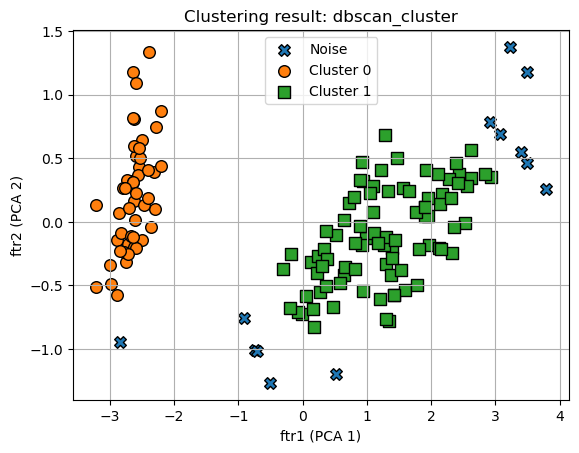

14

In [37]:
visualize_cluster_plot(iris_dbscan, iris_df, 'dbscan_cluster', iscenter=False)


--------------
하이퍼파라미터 튜닝

In [1]:
# iris_dbscan = DBSCAN(eps=0.1, min_samples=8, metric='euclidean')
# dbscan_labels = iris_dbscan.fit_predict(iris.data)
# iris_df['dbscan_cluster'] = dbscan_labels
# visualize_cluster_plot(iris_dbscan, iris_df, 'dbscan_cluster', iscenter=False)


from sklearn.model_selection import GridSearchCV

dt_clf2 = DBSCAN()

params = {'eps' : [i*0.1 for i in range(1, 10)], 'min_samples' : [i for i in range(1, 10)]}
grid_dtree = GridSearchCV(dt_clf2, param_grid=params, cv=5, scoring='neg_mean_squared_error')

grid_dtree.fit(iris.data, iris.target)
# print(grid_dtree.predict(iris.data))

print(f"best param: {grid_dtree.best_params_}")
print(f"best score: {grid_dtree.best_score_}")

NameError: name 'DBSCAN' is not defined